In [71]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import norm

In [72]:
n1 = 100
n2 = 100


In [73]:
def gen_x1():
    return np.random.normal(1, 2, n1)
def gen_x2():
    return np.random.uniform(-1, 1, n2)
x1 = gen_x1()
x2 = gen_x2()

In [74]:
def print_sample_chars(sample):
    print("Среднее {}, s={}, s^2={}".format(
        np.mean(sample),
        np.std(sample),
        np.var(sample)
    ))

print_sample_chars(x1)
print_sample_chars(x2)
pooled = np.concatenate([x1, x2])
print_sample_chars(pooled)

Среднее 0.982647864247411, s=1.86179665814133, s^2=3.466286796266225
Среднее 0.0510984228293162, s=0.5418033634161239, s^2=0.29355088460902445
Среднее 0.5168731435383637, s=1.4480555689921626, s^2=2.0968649308892156


In [100]:
def criterion_t_test(sample): # H0: мат ожидание = 5.3 , сигма неизвестна
    s = np.std(sample) # s - оценка с.к.о.
    mean = np.mean(sample) # выборочное среднее
    m0 = 1.5 # основная гипотеза: МО генеральной совокупности для x2 составляет m0
    return (mean - m0) / s * np.sqrt(len(sample))
t_test_dist = stats.t

# t-test
criterion_value = criterion_t_test(x1) # значение статистики критерия для гипотезы H0: m = 5.3, сигма неизвестна

alpha = 0.1 # задаёмся уровнем значимости
student_quantile = t_test_dist.ppf(1 - alpha / 2, n1 - 1) # рассчитываем квантиль распределения Стьюдента
#Альтернативная гипотеза H': m != 5.3 
critical_value = student_quantile # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение: {}".format(abs(criterion_value), critical_value))

is_h0_true = abs(criterion_value) < critical_value

print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как T(n1 - 1)
def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size - 1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size - 1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(t_test_dist, criterion_value, n1) ))

Значение критерия: 2.778778947154585, критическое значение: 1.6603911559963895
Гипотеза H0 отклоняется
Двустороннее p-value: 0.006529430613994973


In [76]:
def criterion_z_test(sample): # H0: мат ожидание = 5.3 , сигма известна
    m0 = 1
    sigma = 2
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)

z_test_dist = stats.norm

# z-test
criterion_value = criterion_z_test(x1) # значение статистики критерия для гипотезы H0: m = 5.3, сигма известна
#Альтернативная гипотеза H': m>5
alpha = 0.1 # задаёмся уровнем значимости
normal_quantile = z_test_dist.ppf(1 - alpha / 2, n1 - 1) # рассчитываем квантиль нормального распределения

critical_value = normal_quantile # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение: {}".format((criterion_value), critical_value))

is_h0_true = criterion_value < critical_value

print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как N(0,1)
def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, 0,1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, 0 ,1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Правостороннее p-value: {}".format( right_p_value(z_test_dist, criterion_value, n1) ))

Значение критерия: -0.08676067876294491, критическое значение: 100.64485362695147
Гипотеза H0 принимается
Правостороннее p-value: 0.5345691282400089


In [77]:
def criterion_chi2_m(sample): # m известно
    S0 = 2
    n = len(sample)
    m=1
    S=0
    for i in sample:
        S += (i-m)*(i-m)
    S /= 100
    return ((n*S)/(S0*S0))
    
chi2_test_dist = stats.chi2
    
# chi^2-test
criterion_value = criterion_chi2_m(x1) # значение статистики критерия для гипотезы H0: sigma^2 = 4.5, m известно
#Альтернативная гипотеза H': sigma^2 < 4.5
alpha = 0.1 # задаёмся уровнем значимости
chisquare_quantile1 = chi2_test_dist.ppf(alpha/2,n1) # рассчитываем квантиль распределения хи-квадрат
chisquare_quantile2 = chi2_test_dist.ppf(1-alpha/2,n1) # рассчитываем квантиль распределения хи-квадрат
critical_value1 = chisquare_quantile1 # критическое значение статистики критерия
critical_value2 = chisquare_quantile2 # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение1: {}, критическое значение2: {}".format(criterion_value, 
                                                                                           critical_value1,
                                                                                           critical_value2))

is_h0_true1 = critical_value1 < criterion_value 
is_h0_true2 = criterion_value < critical_value2
print("Гипотеза H0 принимается" if (is_h0_true1 and is_h0_true2) else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как chi^2(n1)
def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_dist, criterion_value, n1) ))

Значение критерия: 86.66469732203497, критическое значение1: 77.92946516501726, критическое значение2: 124.34211340400407
Гипотеза H0 принимается
Двустороннее p-value: 0.3468320663130282


In [78]:

def criterion_chi2_no_m(sample):
    S0 = 1.8
    n = len(sample)
    m = np.mean(x1)
    S = 0
    for i in sample:
        S += (i-m)*(i-m)
    S /= 99
    return (((n-1)*S)/(S0*S0))

chi2_test_dist = stats.chi2

# chi^2 no m -test
criterion_value = criterion_chi2_no_m(x1) # значение статистики критерия для гипотезы H0: sigma^2 = 4.5, m неизвестно
#Альтернативная гипотеза H': sigma^2 < 4.5
alpha = 0.1 # задаёмся уровнем значимости
chisquare_quantile1 = chi2_test_dist.ppf(alpha/2,n1-1) # рассчитываем квантиль распределения хи-квадрат
chisquare_quantile2 = chi2_test_dist.ppf(1-alpha/2,n1-1) # рассчитываем квантиль распределения хи-квадрат
critical_value1 = chisquare_quantile1 # критическое значение статистики критерия
critical_value2 = chisquare_quantile2 # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение1: {}, критическое значение2: {}".format(criterion_value, 
                                                                                           critical_value1,
                                                                                           critical_value2))


is_h0_true1 = critical_value1 < criterion_value 
is_h0_true2 = criterion_value < critical_value2
print("Гипотеза H0 принимается" if (is_h0_true1 and is_h0_true2) else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как chi^2(n1-1)
def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size-1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size-1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_dist, criterion_value, n1) ))

Значение критерия: 106.98416037858716, критическое значение1: 77.0463318637603, критическое значение2: 123.2252214533618
Гипотеза H0 принимается
Двустороннее p-value: 0.5485552361087458


In [79]:
def criterion_t2_test(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    S1 = np.var(sample1)
    S2 = np.var(sample2)
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2)
    z /= np.sqrt(S1 / n1 + S2 / n2)
    return z




# t2-test
criterion_value = criterion_t2_test(x1,x2) # значение статистики критерия для гипотезы H0: m1=m2, сигмы неизвестна

alpha = 0.1 # задаёмся уровнем значимости
student_quantile2 = t_test_dist.ppf(1 - alpha / 2, n1+n2 - 2) # рассчитываем квантиль распределения Стьюдента

critical_value = student_quantile2 # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение: {}".format(abs(criterion_value), critical_value))

is_h0_true = abs(criterion_value) < critical_value

print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")



# статистика критерия в предыдущем примере распределена как T(n1 + n2 - 2)
def left_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return dist.cdf(criterion_value, sample_size1 + sample_size2 - 2)

def right_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return 1 - dist.cdf(criterion_value, sample_size1 + sample_size2 - 2)

def two_sided_p_value(dist, criterion_value, sample_size1 , sample_size2):
    left_p = left_p_value(dist, criterion_value, sample_size1 , sample_size2)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(t_test_dist, criterion_value, n1,n2) ))

Значение критерия: 4.804203128891326, критическое значение: 1.6525857836172075
Гипотеза H0 отклоняется
Двустороннее p-value: 3.062845917556345e-06


In [80]:
def criterion_f_test_m(sample1, sample2):
    
    s1=0
    m1=1
    m2=0
    for i in sample1:
        s1 += (i-m1)*(i-m1)
    s1 /= 100
    s2=0
    for i in sample2:
        s2 += (i-m2)*(i-m2)
    s2 /= 100
    
    return (s1)/(s2)

chi2_test_f_dist = stats.f

# 2-sample-F-test
criterion_value = criterion_f_test_m(x1,x2) # значение статистики критерия для гипотезы H0: m1=m2, сигмы неизвестна

alpha = 0.1 # задаёмся уровнем значимости
fisher_quantile1 = chi2_test_f_dist.ppf(alpha / 2, n1,n2) # рассчитываем квантиль распределения Стьюдента
fisher_quantile2 = chi2_test_f_dist.ppf(1 - alpha / 2, n1,n2) # рассчитываем квантиль распределения Стьюдента

critical_value1 = fisher_quantile1 # критическое значение статистики критерия
critical_value2 = fisher_quantile2 # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение1: {}, критическое значение2: {}".format(criterion_value, 
                                                                                           critical_value1,
                                                                                           critical_value2))

is_h0_true1 = critical_value1 < criterion_value 
is_h0_true2 = criterion_value < critical_value2

print("Гипотеза H0 принимается" if (is_h0_true1 and is_h0_true2) else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как F(n1,n2)
def left_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return dist.cdf(criterion_value, sample_size1 , sample_size2 )

def right_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return 1 - dist.cdf(criterion_value, sample_size1 , sample_size2)

def two_sided_p_value(dist, criterion_value, sample_size1 , sample_size2):
    left_p = left_p_value(dist, criterion_value, sample_size1 , sample_size2)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_f_dist, criterion_value, n1,n2) ))

Значение критерия: 11.705042078823281, критическое значение1: 0.7185355690452617, критическое значение2: 1.3917195516552203
Гипотеза H0 отклоняется
Двустороннее p-value: 2.220446049250313e-16


In [81]:
def criterion_f_test_no_m(sample1, sample2):
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    s1 = 0
    for i in sample1:
        s1 += (i-m1)*(i-m1)
    s1 /= 99
    
    s2 = 0
    for i in sample2:
        s2 += (i-m2)*(i-m2)
    s2 /= 99
    
    return (s1)/(s2)

chi2_test_f_dist = stats.f

# 2-sample-F-no-m-test
criterion_value = criterion_f_test_no_m(x1,x2) # значение статистики критерия для гипотезы H0: m1=m2, сигмы неизвестна

alpha = 0.1 # задаёмся уровнем значимости
fisher_no_m_quantile1 = chi2_test_f_dist.ppf(alpha / 2, n1-1,n2-1) # рассчитываем квантиль распределения Стьюдента
fisher_no_m_quantile2 = chi2_test_f_dist.ppf(1 - alpha / 2, n1-1,n2-1) # рассчитываем квантиль распределения Стьюдента

critical_value1 = fisher_no_m_quantile1 # критическое значение статистики критерия
critical_value2 = fisher_no_m_quantile2 # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение1: {}, критическое значение2: {}".format(criterion_value, 
                                                                                           critical_value1,
                                                                                           critical_value2))

is_h0_true1 = critical_value1 < criterion_value 
is_h0_true2 = criterion_value < critical_value2

print("Гипотеза H0 принимается" if (is_h0_true1 and is_h0_true2) else "Гипотеза H0 отклоняется")

# статистика критерия в предыдущем примере распределена как F(n1,n2)
def left_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return dist.cdf(criterion_value, sample_size1-1 , sample_size2-1 )

def right_p_value(dist, criterion_value, sample_size1 , sample_size2):
    return 1 - dist.cdf(criterion_value, sample_size1-1 , sample_size2-1)

def two_sided_p_value(dist, criterion_value, sample_size1 , sample_size2):
    left_p = left_p_value(dist, criterion_value, sample_size1 , sample_size2)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_f_dist, criterion_value, n1,n2) ))

Значение критерия: 11.808129281854878, критическое значение1: 0.7173285927924351, критическое значение2: 1.3940612573481483
Гипотеза H0 отклоняется
Двустороннее p-value: 2.220446049250313e-16


In [97]:
N = 500

criteria = []
p_values = []
criterion_dist = t_test_dist

for i in range(0, N):
    sample1 = gen_x1()
    sample2 = gen_x2()
    
    criterion_value = criterion_t_test(sample1)
    criteria.append(criterion_value)
    
    p_value_left = criterion_dist.cdf(criterion_value, n1-1)
    p_value_right = 1 - p_value_left
    p_value_two_sided = 2 * min(p_value_left, p_value_right)
    p_values.append(p_value_two_sided)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Критерий:
среднее = -0.05898394069488458, s^2 = 1.0945720741666036, s = 1.0462179859697518
P-value:
среднее = 0.4908035543715414, s^2 = 0.08039753828169262, s = 0.28354459663638915


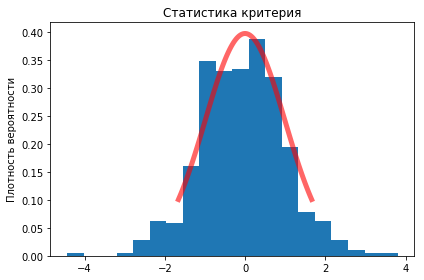

In [102]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 20, normed=True)

# plot
x = np.linspace(criterion_dist.ppf(0.05, n1 - 1), criterion_dist.ppf(0.95,n1 -1), 100)
ax.plot(x, criterion_dist.pdf(x,n1 - 1), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

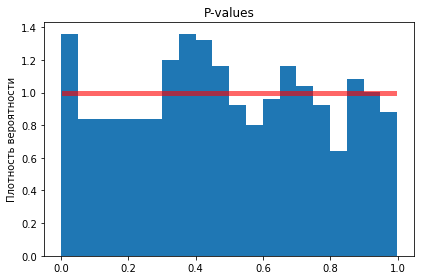

In [103]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 20, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()